## RNN forward

BP神经网络和CNN的输入输出都是互相独立的；但是实际应用中有些场景输出内容和之前的内容是有关联的。

RNN引入“记忆”的概念；递归指其每一个元素都执行相同的任务，但是输出依赖于输入和“记忆”

网络某一时刻的输入xt，和之前介绍的bp神经网络的输入一样，xt是一个n维向量。

不同的是递归网络的输入将是一整个序列，也就是x=[x1,...,xt-1,xt,xt+1,...xT]，对于语言模型，每一个xt将代表一个词向量，一整个序列就代表一句话。

- ht代表时刻t的隐藏状态

- ot代表时刻t的输出


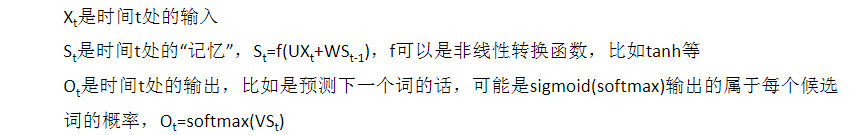

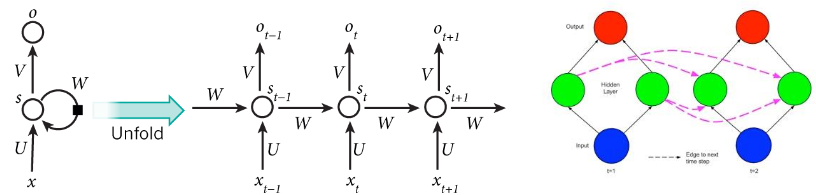
此处的St为下列公式中的ht

---

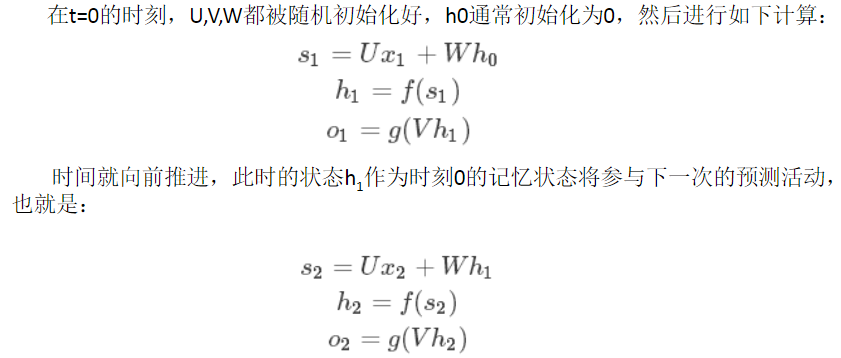

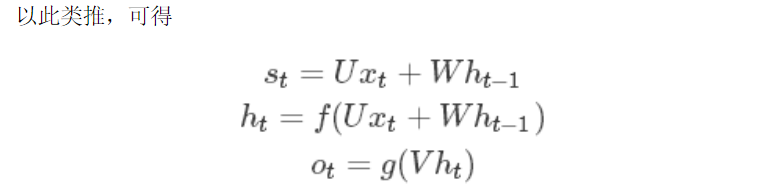

其中f可以是tanh,relu,logistic等激活函数，g通常是softmax也可以是其他。

值得注意的是，我们说递归神经网络拥有记忆能力，而这种能力就是<span class="mark">通过W将以往的输入状态进行总结</span>，而作为下次输入的辅助。

可以这样理解隐藏状态：<span class="mark">h=f(现有的输入+过去记忆总结)</span>


## 反向传播

对于每一时刻t的RNN网络，网络的输出ot都会产生一定误差et，误差的损失函数，可以是交叉熵也可以是平方误差等等。

那么<span class="mark">总的误差</span>为E=∑tet，我们的目标就是要求取
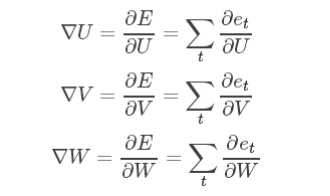
用总的误差对W、U等权重进行求偏导，更新参数

对于输出ot=g(Vht),对于任意损失函数，求取∇V将是简单的，我们可以直接求取每个时刻的∂et/ ∂V

由于它不存在和之前的状态依赖，可以<span class="mark">直接求导取得，然后简单地求和</span>即可。

对于∇W,∇U的计算不能直接求导，因此需要用链式求导法则。

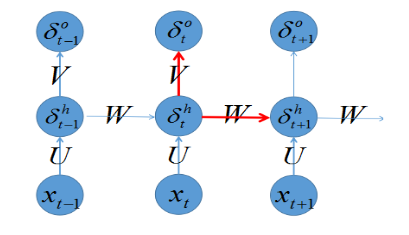

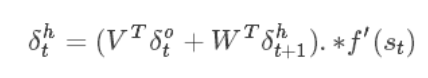
来自t时刻的误差，以及来自t+1时刻的误差的，传递到hidden state的计算

VT和WT来自st分别对  xt和ht+1 求导。

再乘上激活函数的导数

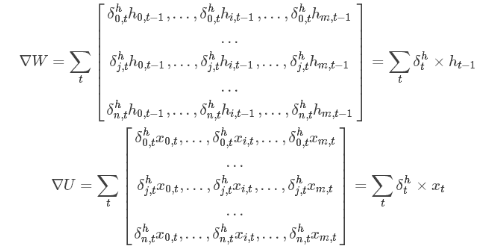
第一个计算式：来自ht的计算式对W求导

第二个计算式：来自ht的计算式对U求导

### 关于梯度消失、梯度爆炸

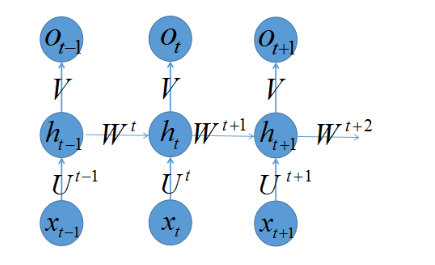

对于时刻t+1产生的误差et+1，我们想计算它对于W1,W2,....,Wt，Wt+1的梯度，可以如下计算：

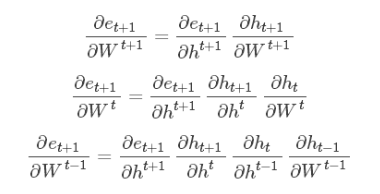

在不同时刻都是共享同样的参数，这样可以大大减少训练参数，和CNN的<span class="mark">共享权重</span>类似。对于共享参数的RNN，我们只需将上述的一系列式子<span class="mark">求和</span>，就可以得到

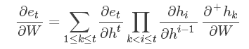
（式中i-1为下标）

其中的：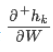为直接求导，该时刻的ht对wt求导，得到的依然是ht的表达式。

[论文](http://proceedings.mlr.press/v28/pascanu13.pdf)证明了
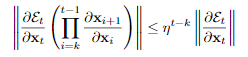

说明了这是梯度求导的一部分环节是一个指数模型，当η<1时，就会出现梯度消失问题，而当η>1时，梯度爆炸也就产生了


满足该条件的η是存在的

### 措施

#### 梯度消失

为了克服梯度消失的问题，LSTM和GRU模型便后续被推出了，为什么LSTM和GRU可以克服梯度消失问题呢？由于它们都有特殊的方式存储”记忆”，那么以前梯度比较大的”记忆”不会像简单的RNN一样马上被抹除，因此可以一定程度上克服梯度消失问题。

1. 合理的初始化方法

2. Vanishing gradient regularization
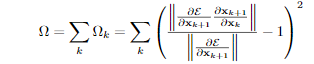

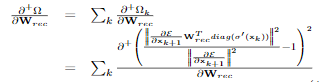

3. batch normalization

#### 梯度爆炸

克服梯度爆炸的问题就是gradient clipping，也就是当你计算的梯度超过阈值c的或者小于阈值−c时候，便把此时的梯度设置成c或−c。

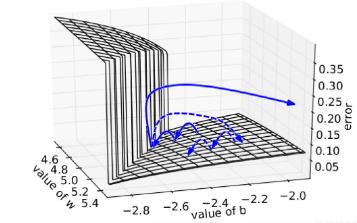